# White House Petitions
I'm not from the United States, that's why I only learned about this system today and was very surprised about how it worked, for the non-American readers who don't know what I'm talking about, I'm refering to [the official White house petitions site](https://petitions.whitehouse.gov/petitions)

It is a site where people can create a petition and if it gets more than 100,000 signatures in 30 days it will be reviewed by White House officials, quite a neat system in  my opinion.

While browsing through it I wondered if there could be some interesting patterns, and as usual I took it as an opportunity to train myself, this time on pandas and matplotlib. 

## Loading the data
Note that the Data was obtained from the site on Saturday, May 30, at 20:00, so it is obviously subject to change by the tile you read this.

I dumped the page and parsed the html directly with a mix of shell and python that I won't include here because it is very messy and I'm not proud of it

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("petitions.csv",
                  header=0, na_values="?" )
df.sort_values(by='signatures',ascending=False,inplace=True)
df.head()

,signatures,title,cat1,cat2,cat3
220,610037,Qatar's secret funding to America's Higher Lea...,Foreign Policy,Education,Civil Rights & Equality
219,579302,"We Call For Investigations Into The ""Bill & Me...",Homeland Security & Defense,Health Care,NaN
218,461399,Terrorism To Get Upperhand If Karman Has Repre...,Homeland Security & Defense,Foreign Policy,NaN
217,385860,Impeach Nancy Pelosi for crimes of Treason!,Immigration,Homeland Security & Defense,Foreign Policy
216,374095,Divest or put in a blind trust all of the Pres...,Government & Regulatory Reform,NaN,NaN


## Number of Signatures

First I'm interested in seeing how the number of signatures are distributed

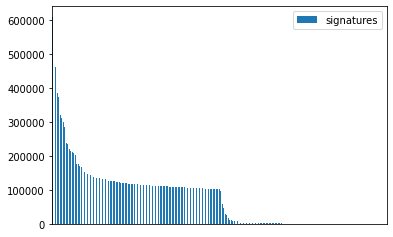

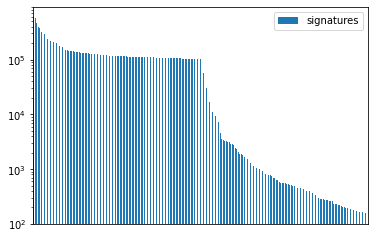

In [10]:
df.plot(kind='bar',x='title',y='signatures')
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

df.plot(kind='bar',x='title',y='signatures',logy=True)
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

I added a logarithmic version so that we can see the instances where the number was too low to be shown

As I suspected we can see a flat region around 100,000 signatures, the reason is very simple: 100,000 is the number of signatures needed for a petition to be taken to the White House, and most people doon't sign if they see that the petition has already reached, still the effect is stronger than I expected


In [4]:
df[(df.signatures > 100000)]['title'].count()

111

In [5]:
df[(df.signatures > 100000) & (df.signatures < 120000)]['title'].count()

62

More than half of the petitions that passed did it with less than 20000 votes more than necessary

## Separations by categories

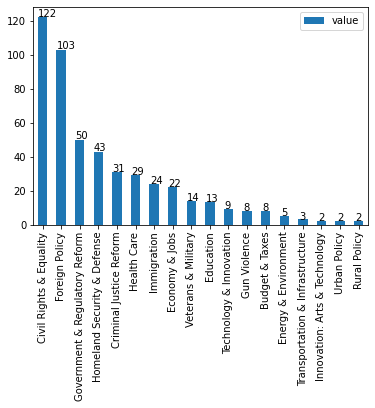

In [6]:
df1 = df.melt(id_vars=['signatures','title'],value_vars=['cat1','cat2','cat3'],var_name=['category'])
df1 = df1.sort_values(by='signatures',ascending=False)

categories = df1["value"].value_counts().to_frame()
ax = categories.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax

With this we can see that US citizens are mostly concerned with topics of *Civil Rights & Equality* and *Foreign Policies*, what about the petitions that have the required number of signatures ?

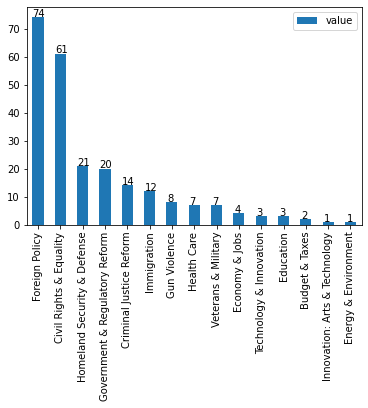

In [7]:
df2 = df1[(df1.signatures > 100000)]

categories_passed = df2["value"].value_counts().to_frame()
ax = categories_passed.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax

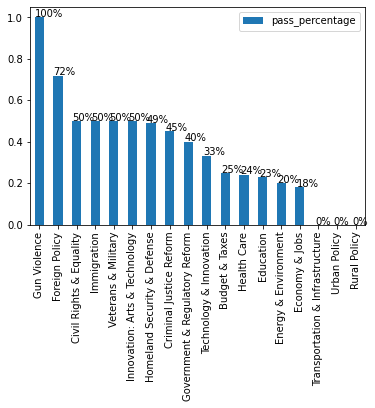

In [24]:
df3 = categories
df3.rename(columns={"value": "Total"},inplace=True)
df3['Passed'] = categories_passed
df3.fillna(0,inplace= True)

df3['pass_percentage'] = df3['Passed']/df3['Total']
df3.sort_values(by=['pass_percentage','Total'],ascending=False,inplace=True)

df3.to_csv('pass_percentage.csv')

ax = df3.plot(y='pass_percentage',kind='bar')
for p in ax.patches:
    ax.annotate(str(round(p.get_height()*100)).split('.')[0]+'%', (p.get_x() * 1.005, p.get_height() * 1.005))
ax

Which means petitions about Gun violence and Foreign policy are the one that get the most signatures